# Load and Inspect Dataset

In [23]:
import pandas as pd

# Load dataset
file_path = '1901_2019_BD_weather.csv'
weather_data = pd.read_csv(file_path)

# Inspect the dataset
print(weather_data.head())
print(weather_data.info())
print(weather_data.describe())


   Year  Month  Temperature     Rain
0  1901      1         16.98   18.54
1  1901      2         19.90   16.25
2  1901      3         24.32   70.80
3  1901      4         28.18   66.16
4  1901      5         27.89  267.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1428 non-null   int64  
 1   Month         1428 non-null   int64  
 2   Temperature   1428 non-null   float64
 3   Rain          1428 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 44.8 KB
None
              Year        Month  Temperature          Rain
count  1428.000000  1428.000000   1428.000000  1428.000000
mean   1960.000000     6.500000     25.078908   202.796317
std      34.363162     3.453262      3.682308   201.972584
min    1901.000000     1.000000     16.800000     0.000000
25%    1930.000000     3.750000     22.120000    18.600000
50% 

# Clean Column Names

In [24]:
# Strip extra spaces from column names
weather_data.columns = weather_data.columns.str.strip()


# Data Visualization

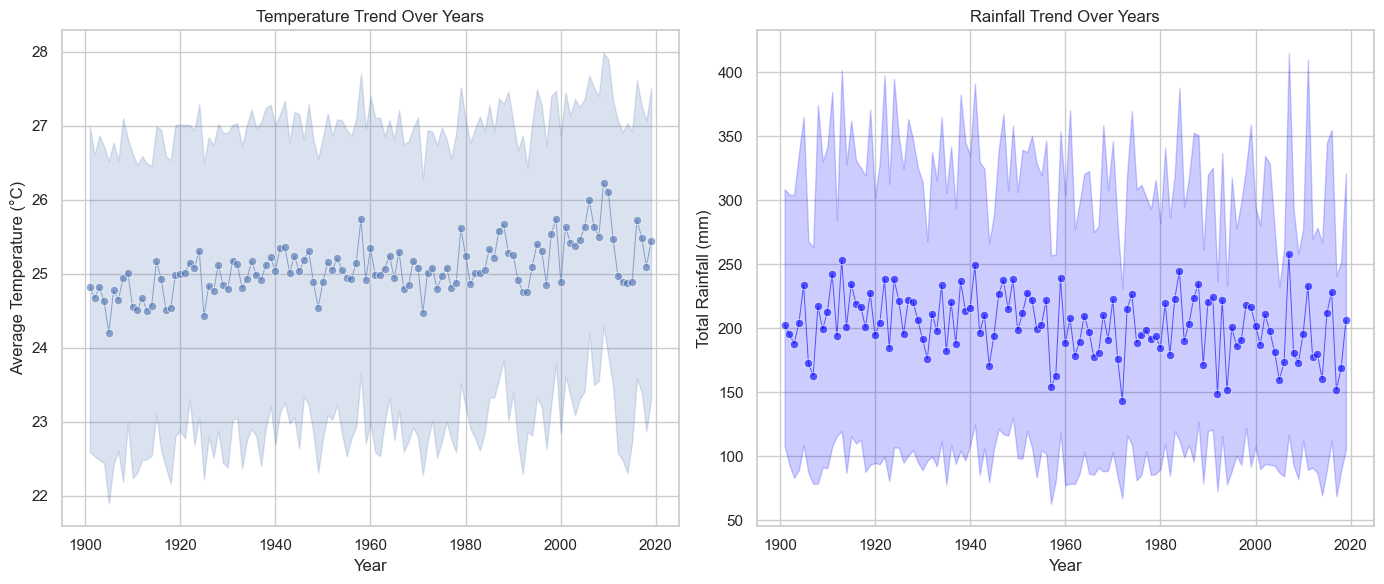

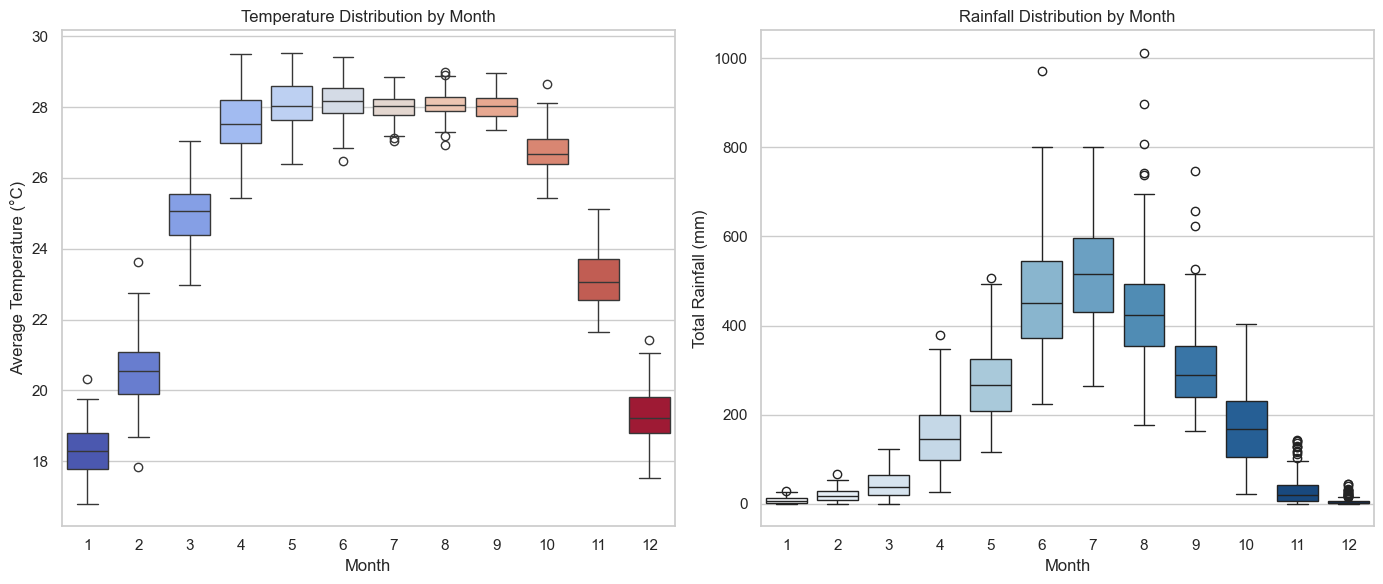

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# Line plot for trends over time
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='Temperature', data=weather_data, marker='o', alpha=0.6, linewidth=0.7)
plt.title('Temperature Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Rain', data=weather_data, marker='o', alpha=0.6, linewidth=0.7, color='blue')
plt.title('Rainfall Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')

plt.tight_layout()
plt.show()

# Boxplots for seasonal (monthly) patterns
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Month', y='Temperature', data=weather_data, palette='coolwarm', hue='Month', dodge=False, legend=False)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend([], [], frameon=False)  # Suppress legend

plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Rain', data=weather_data, palette='Blues', hue='Month', dodge=False, legend=False)
plt.title('Rainfall Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.legend([], [], frameon=False)  # Suppress legend

plt.tight_layout()
plt.show()



# Data Preprocessing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature selection
features = weather_data[['Year', 'Month', 'Temperature']]
target = weather_data['Rain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Supervised Learning Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 7518.515816383881
R2 Score: 0.8112579603401596


# Example new input data

In [ ]:
new_data = pd.DataFrame({
    'Year': [2024], 
    'Month': [11], 
    'Temperature': [25.0]  # Average temperature in Celsius
})

# Scale the new input data
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
predicted_rainfall = model.predict(new_data_scaled)
print(f"Predicted Rainfall: {predicted_rainfall[0]} mm")


Predicted Rainfall: 20.409900000000007 mm
